# Plot Channel's Views Frequency 

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
def bins_to_labels(bins):
    labels = []
    labels.append('{}-'.format(bins[1]))
    for i in range(1, len(bins) - 2):
        labels.append('{}-{}'.format(bins[i]+1, bins[i+1]))
    labels.append('{}+'.format(bins[-2]+1))
    return labels

bins = [0, 355, 745, 1166, 1699, 3120, 4124, 5359, 7116, 9591, 12759, 16543, 22463, 31561,43656, 63295, 93118,
        137730, 218186, 348782, 619299, 1073035, 1916929, 3962322, 9768297, 26759732, 255993258, sys.maxsize]
labels = bins_to_labels(bins)

In [5]:
def views_frequency(fileName):
    df=pd.read_csv(fileName)
    #df = df[df.views!= 0]
    #df=df.drop_duplicates(['id'], keep='first')
    df=df.sort_values(by=['views'],ascending=True)
    df['view_range'] = pd.cut(df['views'], bins=bins, labels=labels)
    freq=df['view_range'].value_counts().sort_index(ascending=True)
    q=df.views.quantile([0.25,0.5,0.75])
    return freq , q
    

### Frequency of views in each group of channels

In [6]:
def view_2plots(channels):
    p_col=0
    for i in channels:
        file=fileNames[i]+'_data_clean.csv'
        fileName=os.path.join(data_folder_channels,file)
        freq,q=views_frequency(fileName)
        freq.plot(kind='bar',ax=axes[p_col], figsize=(17,7))
        axes[p_col].set_title('Keyword: '+fileNames[i])
        p_col+=1
        print("\n"+fileNames[i]+" quartiles: ")
        print (q)


minecraft quartiles: 
0.25       758.0
0.50      7271.0
0.75    205546.0
Name: views, dtype: float64

overwatch quartiles: 
0.25      192.0
0.50     1891.0
0.75    66512.0
Name: views, dtype: float64

agario quartiles: 
0.25      198.0
0.50     1238.0
0.75    12339.0
Name: views, dtype: float64

LOL quartiles: 
0.25      154.0
0.50     1484.0
0.75    28894.0
Name: views, dtype: float64

callOD quartiles: 
0.25       137.0
0.50      3930.0
0.75    181805.0
Name: views, dtype: float64

fivenaf quartiles: 
0.25      139.0
0.50     1132.0
0.75    27629.0
Name: views, dtype: float64

pkgo quartiles: 
0.25       235.0
0.50      4811.0
0.75    555890.5
Name: views, dtype: float64

roblox quartiles: 
0.25      259.00
0.50     1349.00
0.75    11732.75
Name: views, dtype: float64

gta quartiles: 
0.25       359.0
0.50      7135.0
0.75    246352.5
Name: views, dtype: float64

happyW quartiles: 
0.25     145.0
0.50     754.0
0.75    5627.5
Name: views, dtype: float64


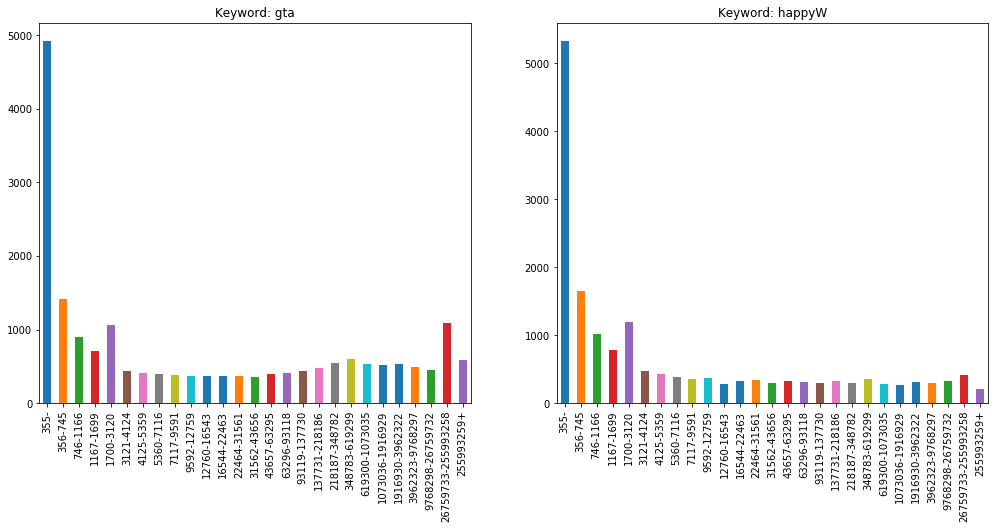

In [180]:
fileNames=['minecraft', 'overwatch','agario', 'LOL', 'callOD','fivenaf','pkgo','roblox', 'gta','happyW']
data_folder_channels='/media/aruiz/data/channels_clean_data/'
fig, axes = plt.subplots(nrows=1, ncols=2)

for i in range (0,len(fileNames),2):
    channels=[i,i+1]
    view_2plots(channels)


## Statistics in general

In [7]:
data_folder_channels='/media/aruiz/data/channels_clean_data/'
fileName2=os.path.join(data_folder_channels,'all_channels_clean.csv')
f,q=views_frequency(fileName2)

In [9]:
q

0.25      199.00
0.50     1827.00
0.75    42261.75
Name: views, dtype: float64